In [51]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [52]:
#Métriques

# Taux sans risque (OAT 10 ans) en décimal
risk_free_rate = 0.025  # 2.5% annuel

end_date = time.strftime("%Y-%m-%d")

In [53]:
# Demander à l'utilisateur d'entrer les tickers à analyser
tickers = input("Entrez les tickers des actions séparés par des espaces (ex: MC.PA AIR.PA OR.PA SAN.PA BNP.PA): ").split()

# Ajouter l'indice de référence (ex: CAC 40)
indice_reference = input("Entrez l'indice")  # Remplacez par un autre indice si nécessaire
tickers.append(indice_reference)

# Télécharger les données pour tous les tickers
data = yf.download(tickers, start="2010-01-01", end=end_date)["Close"]

# Vérifier la structure des données
print(data.head())


[*********************100%***********************]  6 of 6 completed

Ticker         AIR.PA     BNP.PA      MC.PA      OR.PA     SAN.PA        ^FCHI
Date                                                                          
2010-01-04  11.286738  26.057642  59.380074  61.025864  31.256004  4013.969971
2010-01-05  11.250434  26.007566  59.100918  60.055019  30.842939  4012.909912
2010-01-06  11.351281  26.048534  59.674328  59.527554  30.666687  4017.669922
2010-01-07  11.464230  26.503767  60.353401  59.688076  30.820904  4024.800049
2010-01-08  11.577177  27.131987  61.168293  59.389950  30.650162  4045.139893


In [55]:
# Statistiques descriptives des prix
data.describe()

Ticker,AIR.PA,BNP.PA,MC.PA,OR.PA,SAN.PA,^FCHI
count,3865.000000,3865.000000,3865.000000,3865.000000,3865.000000,3862.000000
mean,71.576366,33.755584,307.216788,199.311032,60.751545,5150.645482
std,41.526290,12.375961,241.558467,117.263588,19.636296,1323.212846
min,10.931757,11.262345,56.490292,55.881123,25.782616,2781.679932
25%,38.682251,25.307070,109.497391,103.274300,49.235065,4105.474854
50%,63.677204,30.222763,201.884872,159.545486,59.740528,4980.584961
75%,107.323174,40.559383,545.512268,304.026398,75.630470,6040.417603
max,169.711990,68.339996,871.436646,456.899994,105.760002,8239.990234


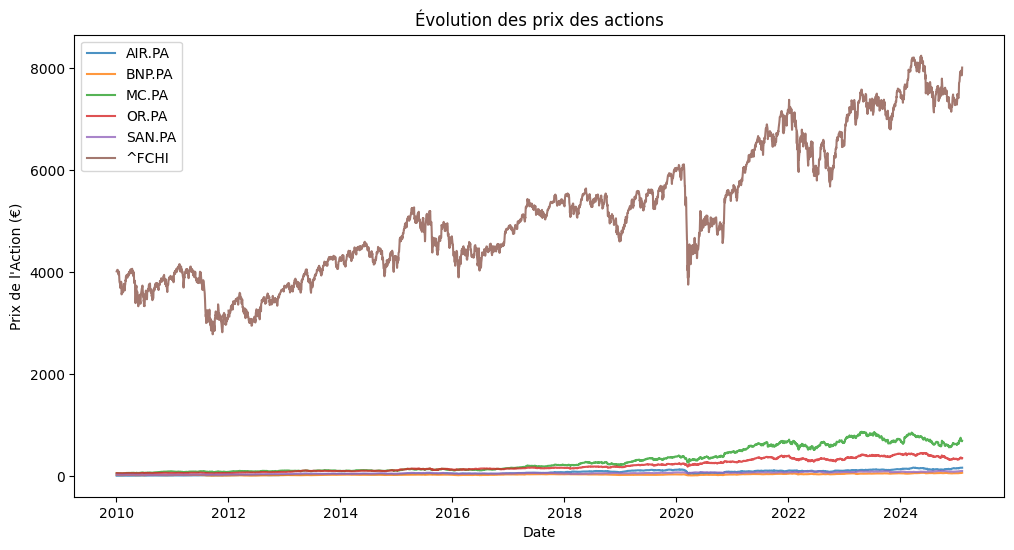

In [56]:
plt.figure(figsize=(12,6))

# Tracer la courbe de chaque action + indice
for col in data.columns:
    plt.plot(data.index, data[col], label=col, alpha=0.8)

# Mise en forme du graphique
plt.xlabel("Date")
plt.ylabel("Prix de l'Action (€)")
plt.title("Évolution des prix des actions")
plt.legend()
plt.show()


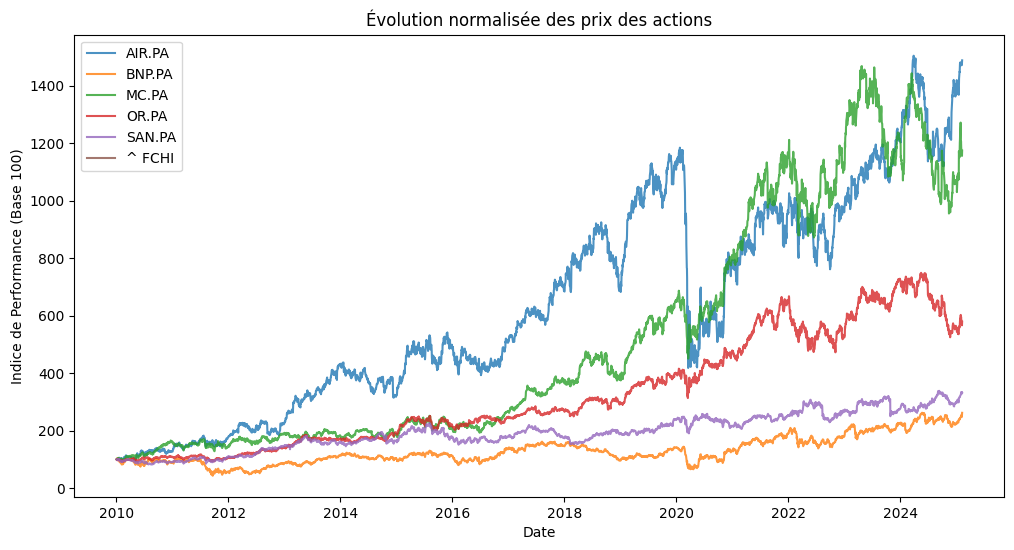

In [41]:
# Normalisation des prix (base 100 au début)
normalized_prices = data / data.iloc[0] * 100

plt.figure(figsize=(12,6))

# Tracer la courbe normalisée pour chaque action
for col in normalized_prices.columns:
    plt.plot(normalized_prices.index, normalized_prices[col], label=col, alpha=0.8)

# Mise en forme du graphique
plt.xlabel("Date")
plt.ylabel("Indice de Performance (Base 100)")
plt.title("Évolution normalisée des prix des actions")
plt.legend()
plt.show()


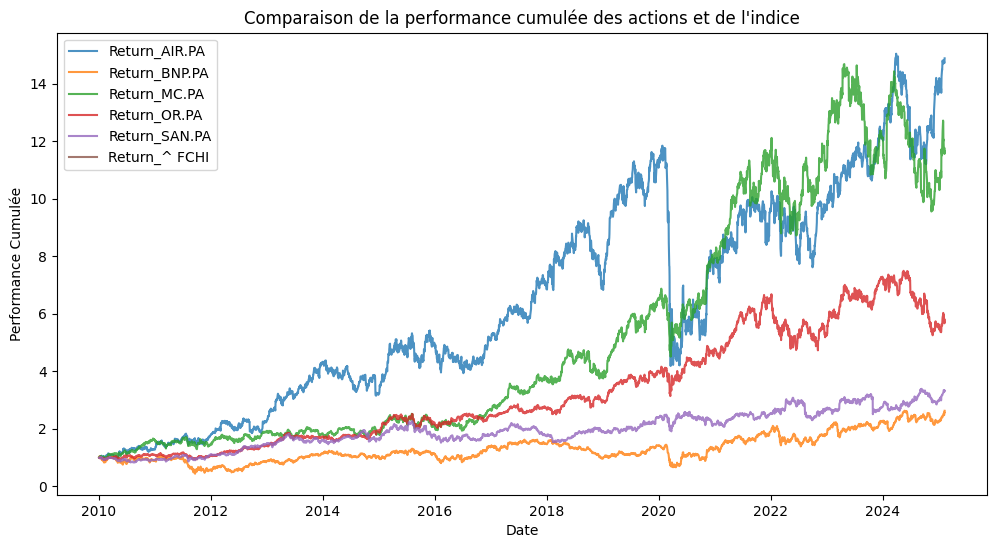

In [57]:
# Calcul des rendements cumulés
cumulative_returns = (1 + data_extended.filter(like="Return_")).cumprod()

plt.figure(figsize=(12,6))

# Tracer la performance cumulée pour chaque action et l'indice
for col in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[col], label=col, alpha=0.8)

# Mise en forme
plt.xlabel("Date")
plt.ylabel("Performance Cumulée")
plt.title("Comparaison de la performance cumulée des actions et de l'indice")
plt.legend()
plt.show()


In [58]:
# Création d'une copie du DataFrame original pour ajouter les rendements
data_extended = data.copy()

# Calcul des rendements journaliers et ajout des colonnes correspondantes
for ticker in data.columns:
    data_extended[f"Return_{ticker}"] = data[ticker].pct_change()

# Vérification
print(data_extended.head())


Ticker         AIR.PA     BNP.PA      MC.PA      OR.PA     SAN.PA  \
Date                                                                
2010-01-04  11.286738  26.057642  59.380074  61.025864  31.256004   
2010-01-05  11.250434  26.007566  59.100918  60.055019  30.842939   
2010-01-06  11.351281  26.048534  59.674328  59.527554  30.666687   
2010-01-07  11.464230  26.503767  60.353401  59.688076  30.820904   
2010-01-08  11.577177  27.131987  61.168293  59.389950  30.650162   

Ticker            ^FCHI  Return_AIR.PA  Return_BNP.PA  Return_MC.PA  \
Date                                                                  
2010-01-04  4013.969971            NaN            NaN           NaN   
2010-01-05  4012.909912      -0.003217      -0.001922     -0.004701   
2010-01-06  4017.669922       0.008964       0.001575      0.009702   
2010-01-07  4024.800049       0.009950       0.017476      0.011380   
2010-01-08  4045.139893       0.009852       0.023703      0.013502   

Ticker      Return

/var/folders/mv/wk6vx0xn40s4hyxqzh2g2qnm0000gn/T/ipykernel_32873/1041158622.py:6: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data_extended[f"Return_{ticker}"] = data[ticker].pct_change()


In [59]:
# Affichage des statistiques descriptives des rendements
returns_stats = data_extended.filter(like="Return_").describe()
print(returns_stats)


Ticker  Return_AIR.PA  Return_BNP.PA  Return_MC.PA  Return_OR.PA  \
count     3864.000000    3864.000000   3864.000000   3864.000000   
mean         0.000922       0.000492      0.000785      0.000548   
std          0.021096       0.022051      0.017218      0.013666   
min         -0.221685      -0.174004     -0.086779     -0.075803   
25%         -0.009449      -0.010053     -0.008420     -0.007110   
50%          0.000880       0.000522      0.000793      0.000474   
75%          0.010966       0.010964      0.009858      0.007976   
max          0.204633       0.179808      0.128119      0.084374   

Ticker  Return_SAN.PA  Return_^FCHI  
count     3864.000000   3864.000000  
mean         0.000407      0.000256  
std          0.013839      0.012387  
min         -0.189329     -0.122768  
25%         -0.007101     -0.005586  
50%          0.000468      0.000601  
75%          0.008118      0.006482  
max          0.063066      0.096593  


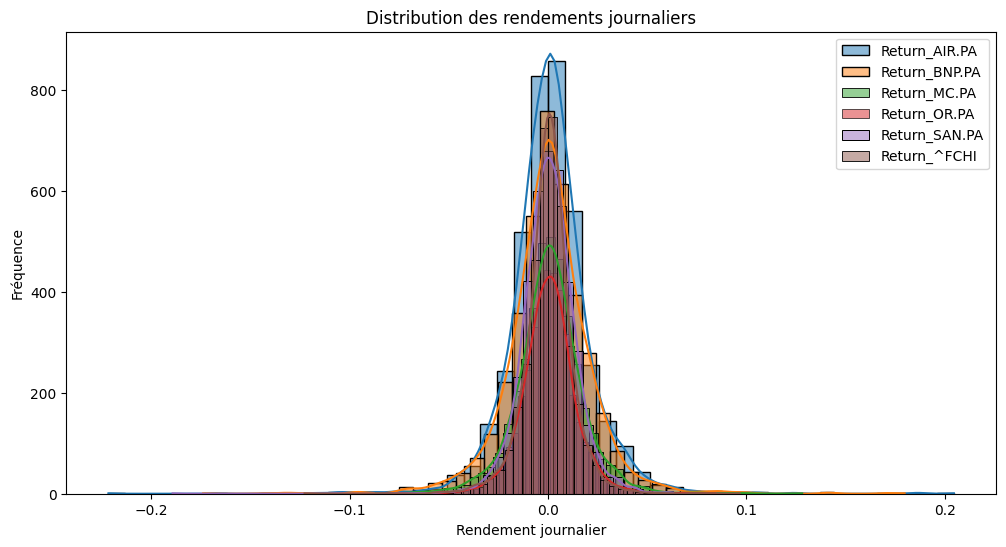

In [60]:
plt.figure(figsize=(12,6))
for col in data_extended.filter(like="Return_").columns:
    sns.histplot(data_extended[col].dropna(), bins=50, kde=True, label=col, alpha=0.5)

plt.xlabel("Rendement journalier")
plt.ylabel("Fréquence")
plt.title("Distribution des rendements journaliers")
plt.legend()
plt.show()

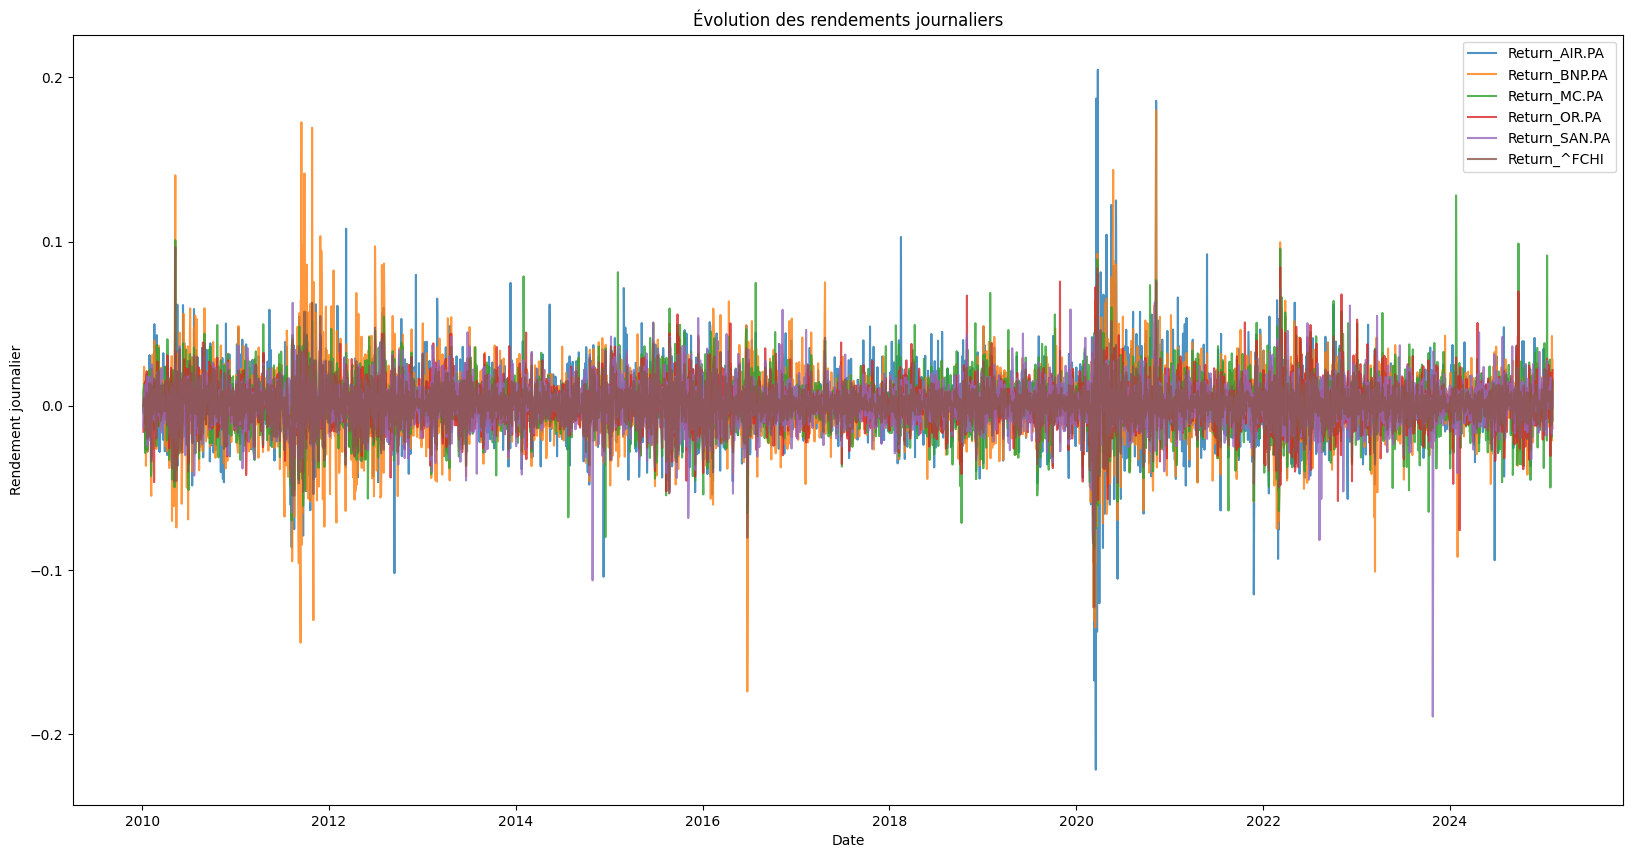

In [61]:
plt.figure(figsize=(20,10))
for col in data_extended.filter(like="Return_").columns:
    plt.plot(data_extended.index, data_extended[col], label=col, alpha=0.8)

plt.xlabel("Date")
plt.ylabel("Rendement journalier")
plt.title("Évolution des rendements journaliers")
plt.legend()
plt.show()

In [62]:
# Calcul de la volatilité annuelle pour toutes les actions
volatility = data_extended.filter(like="Return_").std() * (252**0.5)

# Affichage
print("\n🔹 Volatilité annuelle des actifs :")
print(volatility)



🔹 Volatilité annuelle des actifs :
Ticker
Return_AIR.PA    0.334883
Return_BNP.PA    0.350051
Return_MC.PA     0.273334
Return_OR.PA     0.216937
Return_SAN.PA    0.219691
Return_^FCHI     0.196637
dtype: float64


/var/folders/mv/wk6vx0xn40s4hyxqzh2g2qnm0000gn/T/ipykernel_32873/972004408.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=volatility.index, y=volatility.values, palette="coolwarm")


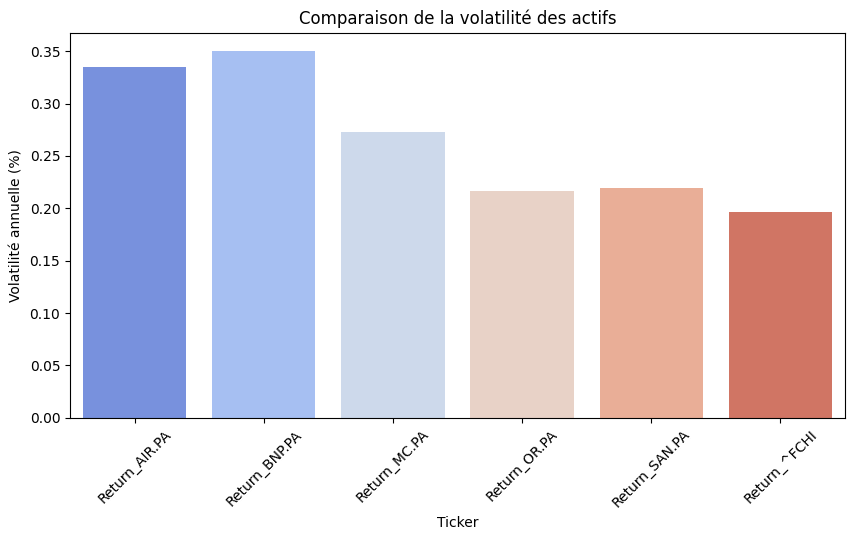

In [63]:
plt.figure(figsize=(10,5))
sns.barplot(x=volatility.index, y=volatility.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.ylabel("Volatilité annuelle (%)")
plt.title("Comparaison de la volatilité des actifs")
plt.show()


In [64]:
# Calcul de la matrice de covariance des rendements
cov_matrix = data_extended.filter(like="Return_").cov()

# Identifier l’indice de référence (le nom de la colonne de retour de l’indice)
indice_return_col = f"Return_{indice_reference}"

# Calcul des Betas pour chaque action par rapport à l’indice
betas = cov_matrix[indice_return_col] / cov_matrix.loc[indice_return_col, indice_return_col]

# Suppression de l’indice lui-même
betas = betas.drop(indice_return_col)

# Affichage des Betas
print("\n🔹 Betas des actifs par rapport à l’indice de référence :")
print(betas)



🔹 Betas des actifs par rapport à l’indice de référence :
Ticker
Return_AIR.PA    1.134286
Return_BNP.PA    1.415809
Return_MC.PA     1.096612
Return_OR.PA     0.771127
Return_SAN.PA    0.667736
Name: Return_^FCHI, dtype: float64


/var/folders/mv/wk6vx0xn40s4hyxqzh2g2qnm0000gn/T/ipykernel_32873/732023411.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=betas.index, y=betas.values, palette="coolwarm")


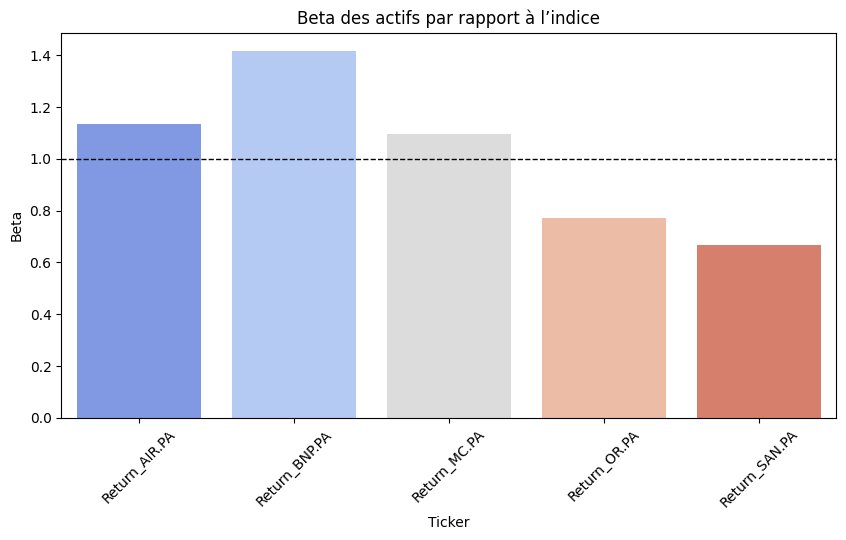

In [65]:
plt.figure(figsize=(10,5))
sns.barplot(x=betas.index, y=betas.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.ylabel("Beta")
plt.title("Beta des actifs par rapport à l’indice")
plt.axhline(y=1, color="black", linestyle="--", linewidth=1)  # Ligne de référence Beta = 1
plt.show()


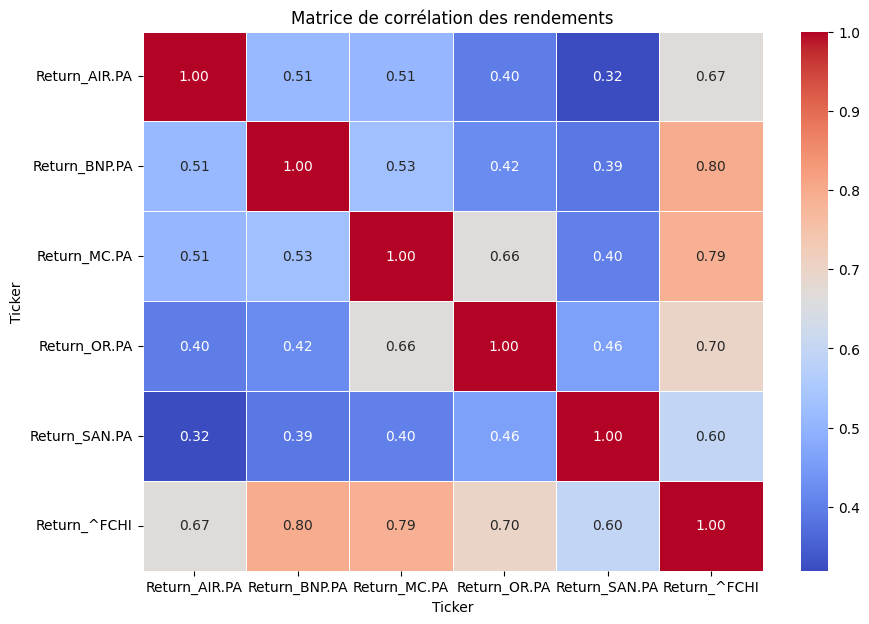

In [66]:
# Calcul de la matrice de corrélation
correlation_matrix = data_extended.filter(like="Return_").corr()

# Affichage sous forme de heatmap
plt.figure(figsize=(10,7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation des rendements")
plt.show()


In [71]:
# Définition du taux sans risque
risk_free_rate = 0.025  # Rendement sans risque (modifiable)
# Vérifier les rendements annuels moyens
annual_returns = data_extended.filter(like="Return_").mean() * 252
print("\n🔹 Aperçu des annual_returns :")
print(annual_returns.head())

# Vérifier la volatilité annuelle
volatility = data_extended.filter(like="Return_").std() * (252**0.5)
print("\n🔹 Aperçu de volatility :")
print(volatility.head())

# Calcul du Sharpe Ratio
sharpe_ratios = (annual_returns - risk_free_rate) / volatility

# Vérification du résultat
print("\n✅ Sharpe Ratio calculé avec succès :")
print(sharpe_ratios.head())


🔹 Aperçu des annual_returns :
Ticker
Return_AIR.PA    0.232254
Return_BNP.PA    0.124043
Return_MC.PA     0.197916
Return_OR.PA     0.137997
Return_SAN.PA    0.102577
dtype: float64

🔹 Aperçu de volatility :
Ticker
Return_AIR.PA    0.334883
Return_BNP.PA    0.350051
Return_MC.PA     0.273334
Return_OR.PA     0.216937
Return_SAN.PA    0.219691
dtype: float64

✅ Sharpe Ratio calculé avec succès :
Ticker
Return_AIR.PA    0.618886
Return_BNP.PA    0.282938
Return_MC.PA     0.632618
Return_OR.PA     0.520877
Return_SAN.PA    0.353119
dtype: float64


In [74]:
# Supprimer "Return_" des index pour correspondre aux tickers des prix
sharpe_ratios.index = sharpe_ratios.index.str.replace("Return_", "")

# Charger les métriques existantes
metrics_data = pd.DataFrame({
    "Volatilité": volatility,
    "Beta": betas  # Assurez-vous que "betas" est bien calculé avant
})

# Supprimer "Return_" des index pour correspondre aux tickers des prix
volatility.index = volatility.index.str.replace("Return_", "")
betas.index = betas.index.str.replace("Return_", "")

# Ajouter le Sharpe Ratio au DataFrame
metrics_data["Sharpe Ratio"] = sharpe_ratios

# Sauvegarde des résultats
metrics_data.to_csv("metrics_data.csv", index=True)

print("✅ Données sauvegardées avec le Sharpe Ratio dans 'metrics_data.csv' !")


✅ Données sauvegardées avec le Sharpe Ratio dans 'metrics_data.csv' !


In [75]:
import pandas as pd
df_metrics = pd.read_csv("metrics_data.csv", index_col=0)
print(df_metrics.head())


        Volatilité      Beta  Sharpe Ratio
Ticker                                    
AIR.PA    0.334883  1.134286      0.618886
BNP.PA    0.350051  1.415809      0.282938
MC.PA     0.273334  1.096612      0.632618
OR.PA     0.216937  0.771127      0.520877
SAN.PA    0.219691  0.667736      0.353119
